In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kepler-exoplanet-search-results/cumulative.csv


In [219]:
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

In [233]:
data = pd.read_csv('/kaggle/input/kepler-exoplanet-search-results/cumulative.csv', index_col='rowid')

In [234]:
train = data[data.notna().koi_score].copy()
test = data[data.notna().koi_score == False].copy()

In [235]:
train_X = train.drop(['kepid', 'koi_score','kepoi_name', 'kepler_name', 'koi_disposition','koi_pdisposition', 'koi_tce_delivname', 'koi_teq_err1', 'koi_teq_err2'], axis=1)
test_X = test.drop(['kepid','koi_score','kepoi_name', 'kepler_name', 'koi_disposition','koi_pdisposition', 'koi_tce_delivname', 'koi_teq_err1', 'koi_teq_err2'], axis=1)
train_y = train.koi_score
test_y = test.koi_score

In [236]:
train_X = train_X.fillna(train_X.mean())
test_X = test_X.fillna(train_X.mean())

In [237]:
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_y)

In [254]:
model = keras.Sequential([
    layers.Dense(units=128, activation='tanh', input_shape=[len(train_X.columns)]),
    layers.Dense(units=128, activation='tanh'),
    layers.Dense(units=64, activation='sigmoid'),
    layers.Dense(units=1, activation='sigmoid')
])

In [255]:
model.compile(optimizer='adam', loss='mse')

In [256]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=200
)

Epoch 1/200
24/24 [==============================] - 0s 9ms/step - loss: 0.1750 - val_loss: 0.1591
Epoch 2/200
24/24 [==============================] - 0s 4ms/step - loss: 0.1535 - val_loss: 0.1550
Epoch 3/200
24/24 [==============================] - 0s 4ms/step - loss: 0.1527 - val_loss: 0.1549
Epoch 4/200
24/24 [==============================] - 0s 3ms/step - loss: 0.1511 - val_loss: 0.1533
Epoch 5/200
24/24 [==============================] - 0s 4ms/step - loss: 0.1521 - val_loss: 0.1534
Epoch 6/200
24/24 [==============================] - 0s 4ms/step - loss: 0.1483 - val_loss: 0.1518
Epoch 7/200
24/24 [==============================] - 0s 3ms/step - loss: 0.1498 - val_loss: 0.1555
Epoch 8/200
24/24 [==============================] - 0s 4ms/step - loss: 0.1528 - val_loss: 0.1591
Epoch 9/200
24/24 [==============================] - 0s 4ms/step - loss: 0.1534 - val_loss: 0.1547
Epoch 10/200
24/24 [==============================] - 0s 4ms/step - loss: 0.1509 - val_loss: 0.1518
Epoch 11/

24/24 [==============================] - 0s 3ms/step - loss: 0.1547 - val_loss: 0.1606
Epoch 84/200
24/24 [==============================] - 0s 4ms/step - loss: 0.1540 - val_loss: 0.1597
Epoch 85/200
24/24 [==============================] - 0s 4ms/step - loss: 0.1537 - val_loss: 0.1593
Epoch 86/200
24/24 [==============================] - 0s 4ms/step - loss: 0.1529 - val_loss: 0.1552
Epoch 87/200
24/24 [==============================] - 0s 4ms/step - loss: 0.1517 - val_loss: 0.1598
Epoch 88/200
24/24 [==============================] - 0s 4ms/step - loss: 0.1518 - val_loss: 0.1598
Epoch 89/200
24/24 [==============================] - 0s 4ms/step - loss: 0.1514 - val_loss: 0.1592
Epoch 90/200
24/24 [==============================] - 0s 4ms/step - loss: 0.1511 - val_loss: 0.1606
Epoch 91/200
24/24 [==============================] - 0s 3ms/step - loss: 0.1543 - val_loss: 0.1606
Epoch 92/200
24/24 [==============================] - 0s 4ms/step - loss: 0.1521 - val_loss: 0.1580
Epoch 93/200


24/24 [==============================] - 0s 4ms/step - loss: 0.1608 - val_loss: 0.1597
Epoch 165/200
24/24 [==============================] - 0s 4ms/step - loss: 0.1569 - val_loss: 0.1576
Epoch 166/200
24/24 [==============================] - 0s 3ms/step - loss: 0.1576 - val_loss: 0.1566
Epoch 167/200
24/24 [==============================] - 0s 3ms/step - loss: 0.1488 - val_loss: 0.1486
Epoch 168/200
24/24 [==============================] - 0s 3ms/step - loss: 0.1466 - val_loss: 0.1541
Epoch 169/200
24/24 [==============================] - 0s 3ms/step - loss: 0.1494 - val_loss: 0.1530
Epoch 170/200
24/24 [==============================] - 0s 3ms/step - loss: 0.1490 - val_loss: 0.1566
Epoch 171/200
24/24 [==============================] - 0s 3ms/step - loss: 0.1468 - val_loss: 0.1520
Epoch 172/200
24/24 [==============================] - 0s 3ms/step - loss: 0.1453 - val_loss: 0.1551
Epoch 173/200
24/24 [==============================] - 0s 4ms/step - loss: 0.1489 - val_loss: 0.1564
Epoc

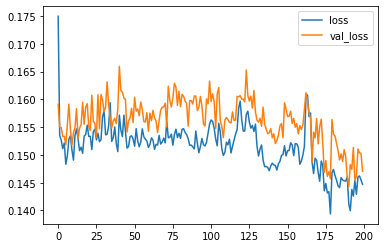

In [257]:
pd.DataFrame(history.history).plot()

In [252]:
test_y = model.predict(test_X)

In [253]:
test_y

array([[0.07052004],
       [0.6911719 ],
       [0.8923579 ],
       ...,
       [0.19576901],
       [0.35151732],
       [0.0492003 ]], dtype=float32)